### Install & Connect to db 

In [58]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


### Import Libraries 

In [59]:
import mysql.connector
import pandas as pd
import numpy as np

In [60]:
cnx = mysql.connector.connect(
   host="cpanel.insaid.co",
   user="student",
   passwd="student",
   database='Capstone1'
)

In [61]:
cursor = cnx.cursor()

### Reading the Data 

In [62]:
query_events_data = pd.read_csv('events_data.csv')

In [63]:
query_events_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.0,2.918269e+16,2016-05-01 00:55:25,77.266049,28.68161,Delhi,Delhi
1,7104.0,2.918269e+16,2016-05-02 09:37:02,77.266049,28.68161,Delhi,Delhi
2,29661.0,2.918269e+16,2016-05-04 00:56:04,77.266049,28.68161,Delhi,Delhi
3,33133.0,2.918269e+16,2016-05-06 05:01:15,77.266049,28.68161,Delhi,Delhi
4,38980.0,2.918269e+16,2016-05-06 09:55:04,77.266049,28.68161,Delhi,Delhi


### Create Dataframes for each of the state 

In [64]:
df_events_data_MP = query_events_data[query_events_data['state'] == 'MadhyaPradesh']
df_events_data_Ctg = query_events_data[query_events_data['state'] =='Chhattisgarh']
df_events_data_Utl = query_events_data[query_events_data['state'] =='Uttaranchal']
df_events_data_JK = query_events_data[query_events_data['state'] =='JammuandKashmir']
df_events_data_GA = query_events_data[query_events_data['state'] =='Goa']
df_events_data_NL = query_events_data[query_events_data['state'] =='Nagaland']

### Get data for phone brands and Gender age from database 

In [65]:
#query for gender_age_train
query_gender_age_train = ("SELECT * FROM gender_age_train")

#query for phone_brand_device_model
query_phone_brand_device_model = ("SELECT * FROM phone_brand_device_model")


In [66]:
cursor.execute(query_gender_age_train)
table_rows = cursor.fetchall()
df_gender_age_train = pd.DataFrame(table_rows)
df_gender_age_train.columns=[i[0] for i in cursor.description]
df_gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [67]:
#dataframe 'df_query_phone_brand_device_model' contains data and colunm names from the table 'phone_brand_device_model'

cursor.execute(query_phone_brand_device_model)
table_rows = cursor.fetchall()
df_query_phone_brand_device_model = pd.DataFrame(table_rows)
df_query_phone_brand_device_model.columns=[i[0] for i in cursor.description]
df_query_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [68]:
print('Shape of df_gender_age_train is ', df_gender_age_train.shape)
print('Shape of df_query_phone_brand_device_model is', df_query_phone_brand_device_model.shape)
print('Shape of df_events_data_MP is', df_events_data_MP.shape)
print('Shape of df_events_data_Ctg is', df_events_data_Ctg.shape)
print('Shape of df_events_data_Utl is', df_events_data_Utl.shape)
print('Shape of df_events_data_JK is', df_events_data_JK.shape)
print('Shape of df_events_data_GA is', df_events_data_GA.shape)
print('Shape of df_events_data_NL is', df_events_data_NL.shape)

Shape of df_gender_age_train is  (74645, 4)
Shape of df_query_phone_brand_device_model is (87726, 3)
Shape of df_events_data_MP is (232690, 7)
Shape of df_events_data_Ctg is (9754, 7)
Shape of df_events_data_Utl is (7720, 7)
Shape of df_events_data_JK is (5385, 7)
Shape of df_events_data_GA is (3250, 7)
Shape of df_events_data_NL is (2298, 7)


In [69]:
df_gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [70]:
df_query_phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


#### Checking the Null values 

In [71]:
#print('Null entire set:', df_events_data_preprocess.isnull().sum())
print('Null for MP:', df_events_data_MP.isnull().sum())
print('Null for Ctg:', df_events_data_Ctg.isnull().sum())
print('Null for Utl:', df_events_data_Utl.isnull().sum())
print('Null for JK:', df_events_data_JK.isnull().sum())
print('Null for GA:', df_events_data_GA.isnull().sum())
print('Null for NL:', df_events_data_NL.isnull().sum())

Null for MP: event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64
Null for Ctg: event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64
Null for Utl: event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64
Null for JK: event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64
Null for GA: event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64
Null for NL: event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64


#### Replacing the Null values 

In [72]:
df_events_data_MP['longitude'] = df_events_data_MP['longitude'].fillna(df_events_data_MP['longitude'].value_counts().index[0])
df_events_data_MP['latitude'] = df_events_data_MP['latitude'].fillna(df_events_data_MP['latitude'].value_counts().index[0])

D:\DATASCIENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\DATASCIENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
# for continous variabes, using mean() function to imppute the 51 missing values.
df_events_data_MP['device_id'] = df_events_data_MP['device_id'].fillna(df_events_data_MP['device_id'].mean())

D:\DATASCIENCE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
df_events_data_MP.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Am not sure how to find the anomalies in the data points for states latitude and longitude ,i have considered only one state as of now 

In [75]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [76]:
# Initializing the map to state
NL_map = folium.Map(location=[26, 94], zoom_start=7)    # Nagaland latitude and Longitude

# display the map of Goa
NL_map

# instantiate a feature group for the data in the dataframe
NL_init = folium.map.FeatureGroup()

# loop through the data of Goa data 
for lat, lng, in zip(df_events_data_NL.latitude, df_events_data_NL.longitude):
    NL_init.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='Red',
            fill_opacity=0.6
        )
    )
NL_map.add_child(NL_init)

#### Combining all the different states data into single datafrane df_events_data

In [77]:
frames = (df_events_data_MP, df_events_data_Ctg, df_events_data_Utl, df_events_data_JK, df_events_data_GA, df_events_data_NL)
df_events_data = pd.concat(frames)
print(df_events_data.shape)
print(df_events_data.info())
print(df_events_data.isnull().sum())

(261097, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 261097 entries, 2197849 to 2458994
Data columns (total 7 columns):
event_id     261097 non-null float64
device_id    261097 non-null float64
timestamp    261097 non-null object
longitude    261097 non-null float64
latitude     261097 non-null float64
city         261097 non-null object
state        261097 non-null object
dtypes: float64(4), object(3)
memory usage: 15.9+ MB
None
event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64


### Importing libraries for Data Analysis 

In [78]:
import matplotlib.pyplot as plt 
import seaborn as sns 

state
Chhattisgarh         9754
Goa                  3250
JammuandKashmir      5385
MadhyaPradesh      232690
Nagaland             2298
Uttaranchal          7720
Name: device_id, dtype: int64


Text(0.5, 1.0, 'Distribution of Users across States')

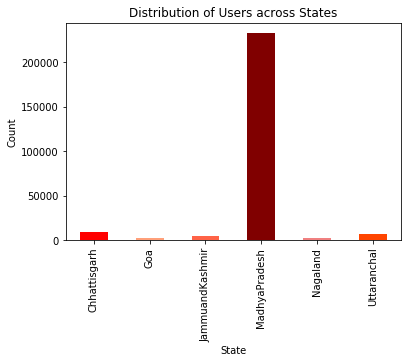

In [79]:
# Distribution of Users across States 

users_per_state = df_events_data.groupby(['state'])['device_id'].count()
print(users_per_state)
users_per_state.plot.bar(color = ['red','lightsalmon','tomato','maroon','lightcoral','orangered'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Users across States')

phone_brand
小米      21645
三星      19211
华为      15181
vivo     7596
OPPO     6717
魅族       5531
酷派       3979
HTC      1272
联想        982
乐视        841
Name: device_id, dtype: int64


Text(0.5, 1.0, 'Distribution of Users across Phone Brands')

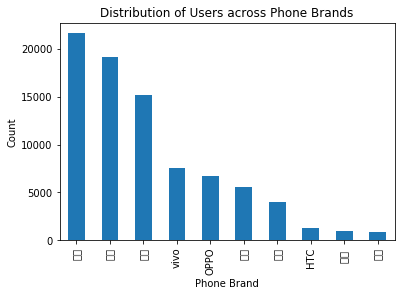

In [80]:
# Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

users_per_brand = df_query_phone_brand_device_model.groupby(['phone_brand'])['device_id'].count()
users_per_brand_top = users_per_brand.sort_values(ascending = False).head(10)
print(users_per_brand_top)
users_per_brand_top.plot.bar()
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.title('Distribution of Users across Phone Brands')

# (__Pending__) need to Convert these chinese characters to exact Indian Alphabets 


gender
F    26741
M    47904
Name: device_id, dtype: int64


Text(0.5, 1.0, 'Distribution of Users across Gender')

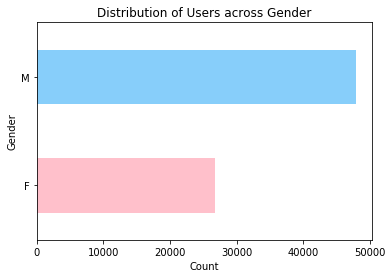

In [81]:
# Distribution of Users across Gender

users_per_gender = df_gender_age_train.groupby(['gender'])['device_id'].count()
print(users_per_gender)
users_per_gender.plot.barh(color = ['pink','lightskyblue'],width = 0.5)
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Distribution of Users across Gender')


# (__Pending__) i think we need to use graph which shows the total value or percentage 


Text(0.5, 1.0, 'Distribution of Users across Age')

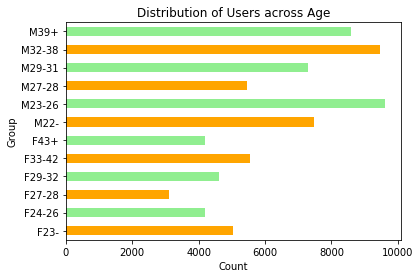

In [82]:
# Distribution of Users across Age Segments

# Distribution of Users across Gender
users_per_gender = df_gender_age_train.groupby(['group'])['device_id'].count()

users_per_gender.plot.barh(color = ['orange','lightgreen'])
plt.xlabel('Count')
plt.ylabel('Group')
plt.title('Distribution of Users across Age')

# (__Pending__) i think we need to Group Age like in 10-20 , 20-30 , 30-40 etc 

In [83]:
# Combinging all the dataframes for further analysis 

df_event_phone_merge = pd.merge(df_events_data,df_query_phone_brand_device_model ,on ='device_id')
df_all = pd.merge(df_event_phone_merge,df_gender_age_train,on = 'device_id')
df_all.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,10441.0,-5.334703e+17,2016-05-03 11:25:00,75.9122,22.731945,Indore,MadhyaPradesh,小米,红米note,F,38,F33-42
1,13461.0,-5.334703e+17,2016-05-04 13:12:14,75.9122,22.731945,Indore,MadhyaPradesh,小米,红米note,F,38,F33-42
2,18882.0,-5.334703e+17,2016-05-03 17:15:16,75.9122,22.731945,Indore,MadhyaPradesh,小米,红米note,F,38,F33-42
3,18997.0,-5.334703e+17,2016-05-03 17:16:14,75.9122,22.731945,Indore,MadhyaPradesh,小米,红米note,F,38,F33-42
4,43964.0,-5.334703e+17,2016-05-04 12:45:37,75.9122,22.731945,Indore,MadhyaPradesh,小米,红米note,F,38,F33-42


In [84]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender

import seaborn as sns 

dist_phones = df_all.groupby(['phone_brand','age','state','gender'])['phone_brand'].count()
print(dist_phones)

# (__Pending__) convert chinese characters & Visualization

phone_brand  age  state            gender
HTC          46   Chhattisgarh     M           1
OPPO         23   MadhyaPradesh    M           5
             24   MadhyaPradesh    M         297
vivo         14   MadhyaPradesh    F           4
             22   Goa              M           7
             27   MadhyaPradesh    F         128
三星           19   MadhyaPradesh    F           6
             20   MadhyaPradesh    M          52
             22   MadhyaPradesh    F          97
             25   MadhyaPradesh    M          19
             26   JammuandKashmir  M          13
             27   JammuandKashmir  M           2
                  MadhyaPradesh    M         218
             29   Chhattisgarh     F          13
             30   Nagaland         M           2
             32   MadhyaPradesh    F         466
             36   MadhyaPradesh    M          94
             37   Nagaland         M           5
华为           22   Chhattisgarh     M           1
             23   MadhyaPra

In [85]:
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

dist_gender = df_all.groupby(['gender','state','age','phone_brand'])['gender'].count()
print(dist_gender)

# (__Pending__) convert chinese characters & Visualization

gender  state            age  phone_brand
F       Chhattisgarh     29   三星              13
        MadhyaPradesh    14   vivo             4
                         19   三星               6
                         22   三星              97
                         23   华为              25
                         27   vivo           128
                         32   三星             466
                         38   小米             215
                         49   小米             276
        Nagaland         42   华为              49
M       Chhattisgarh     22   华为               1
                         34   小米              35
                         46   HTC              1
        Goa              22   vivo             7
        JammuandKashmir  26   三星              13
                         27   三星               2
                         57   魅族              63
        MadhyaPradesh    20   三星              52
                         21   小米              87
                         23

In [86]:
#Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).

dist_age = df_all.groupby(['age','state','gender','phone_brand'])['age'].count()
print(dist_age)

# (__Pending__) convert chinese characters & Visualization

age  state            gender  phone_brand
14   MadhyaPradesh    F       vivo             4
19   MadhyaPradesh    F       三星               6
20   MadhyaPradesh    M       三星              52
21   MadhyaPradesh    M       小米              87
22   Chhattisgarh     M       华为               1
     Goa              M       vivo             7
     MadhyaPradesh    F       三星              97
23   MadhyaPradesh    F       华为              25
                      M       OPPO             5
24   MadhyaPradesh    M       OPPO           297
                              小米              64
25   MadhyaPradesh    M       三星              19
26   JammuandKashmir  M       三星              13
     MadhyaPradesh    M       酷派             141
27   JammuandKashmir  M       三星               2
     MadhyaPradesh    F       vivo           128
                      M       三星             218
                              小米              21
28   MadhyaPradesh    M       华为              64
                           

hours
0      8059
1      4299
2      3060
3      2747
4      2592
5      4113
6      7040
7      9328
8     11962
9     13247
10    14500
11    16188
12    17016
13    16073
14    14117
15    12794
16    12219
17    12080
18    12890
19    13909
20    14464
21    14993
22    13385
23    10022
Name: event_id, dtype: int64


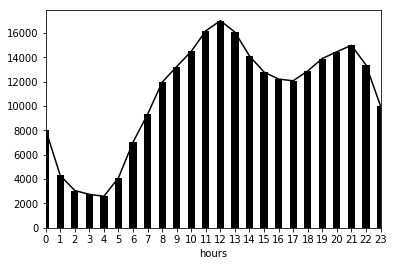

In [87]:
# Hourly distribution of Phone Calls.

df_events_data['date_time'] = pd.to_datetime(df_events_data['timestamp'])  # Convert into datetime format 

df_events_data['hours'] = df_events_data['date_time'].dt.hour    # createda new column considering only hour 
phone_hr = df_events_data.groupby(['hours'])['event_id'].count()
print(phone_hr)
phone_hr.plot.bar(color = 'black')
phone_hr.plot.line(color = 'black')


In [ ]:
# Plot the Users on the Map using any suitable package.

# (__Pending__)
# Am not sure if we can plot all the 2L points on the graph 

'''users_map = folium.Map(location=[26, 94], zoom_start=7)     

# display the map of India 
users_map

# instantiate a feature group for the data in the dataframe
user_init = folium.map.FeatureGroup()

# loop through the data of events data 
for lat, lng, in zip(df_events_data.latitude, df_events_data.longitude):
    NL_init.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='Purple',
            fill_opacity=0.6
        )
    )
user_map.add_child(user_init)'''

